# Explanatory Polishing
## Diamonds Dataset
*By Carla Mota Leal*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Explanatory Polishing

Through the last few workbooks, I've performed an exploration of a dataset relating the price of *diamonds* to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, I have found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, I'll polish two plots that I found to be the best approach for the dataset based on the earlier exploration so that they can be presented in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Additions and revisions to the code below to refine the given plot.

In [4]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

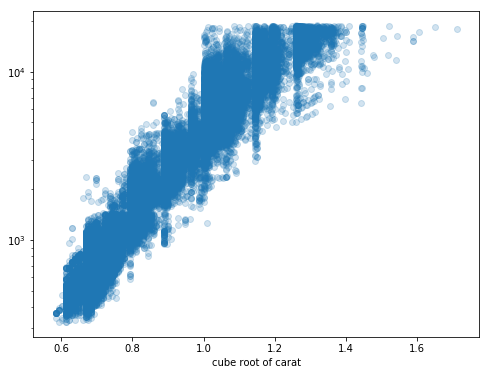

In [10]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha=1/5)

plt.xlabel('cube root of carat')

plt.yscale('log')

plt.show()

The second plot that I will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. 

In [6]:
# selecting diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

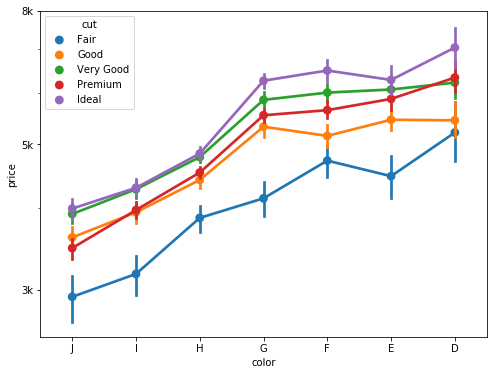

In [7]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

Price vs. Color, Cut: 
Polishing comment: 
    **1)** The default color palette used is qualitative, but I should probably choose a sequential palette instead. 
    **2)** I could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. 
    **3)** One other possible modification I could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.

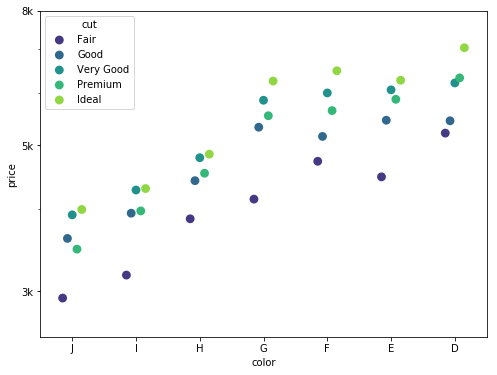

In [11]:
plt.figure(figsize=[8,6])

# Choosing a sequential palette
color_palette = sb.color_palette("viridis", len(ordinal_var_dict['cut']))

# Adding the dodge parameter to separate the points
ax = sb.pointplot(data=diamonds_1c, x='color', y='price', hue='cut', dodge=0.3, palette=color_palette)

# Removing the line connecting points on each level of cut
ax.lines = []

# Special handling of tick marks following seaborn function
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor=True)

plt.show()
